# 피마 인디언 당뇨병 예측

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Binarizer

In [24]:
diabetes = pd.read_csv(r'C:\Users\arceu\Desktop\Machine-Learning\data\diabetes.csv')
print(diabetes['Outcome'].value_counts())
print(diabetes.head())

diabetes.info()

0    500
1    268
Name: Outcome, dtype: int64
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThicknes

In [25]:
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)[:, 1]

def get_clf_eval(y_test, pred, pred_prob):
    print('Confusion Matrix\n', confusion_matrix(y_test, pred))
    print('Accuracy: ', accuracy_score(y_test, pred))
    print('Precision: ', precision_score(y_test, pred))
    print('Recall: ', recall_score(y_test, pred))
    print('F1_score: ', f1_score(y_test, pred))
    print('ROC_AUC_score: ', roc_auc_score(y_test, pred_prob))

def roc_curve_plot(y_test, pred_prob):
    fprs, tprs, ths = roc_curve(y_test, pred_prob)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

def precision_recall_curve_plot(y_test, pred_prob):
    precisions, recalls, ths = precision_recall_curve(y_test, pred_prob)

    th_boundary = ths.shape[0]
    plt.plot(ths, precisions[0:th_boundary], linestyle='--', label='precision')
    plt.plot(ths, recalls[0:th_boundary], label='recall')

    plt.xlabel('thresholds')
    plt.legend()
    plt.grid()

    plt.show()

get_clf_eval(y_test, pred, pred_prob)

Confusion Matrix
 [[87 13]
 [22 32]]
Accuracy:  0.7727272727272727
Precision:  0.7111111111111111
Recall:  0.5925925925925926
F1_score:  0.6464646464646464
ROC_AUC_score:  0.8083333333333333


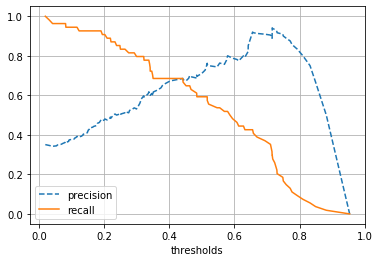

In [26]:
precision_recall_curve_plot(y_test, pred_prob)

### min 값이 0인 column이 존재 => 이를 평균값으로 대체
- 이로써 score가 향상된다

In [37]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   0.,   0.,   1.,   3.,   7.,  25.,  63.,  93., 117.,
         94., 102.,  61.,  54.,  41.,  31.,  25.,  28.,  18.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 <a list of 20 Patch objects>)

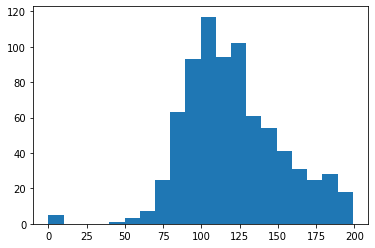

In [32]:
plt.hist(diabetes['Glucose'], bins=20)

In [35]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = diabetes['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes[diabetes[feature] == 0][feature].count()
    print(feature, zero_count, 100 * zero_count / total_count)

Glucose 5 0.6510416666666666
BloodPressure 35 4.557291666666667
SkinThickness 227 29.557291666666668
Insulin 374 48.697916666666664
BMI 11 1.4322916666666667


In [36]:
from sklearn.preprocessing import StandardScaler

mean_zero_features = diabetes[zero_features].mean()
diabetes[zero_features] = diabetes[zero_features].replace(0, mean_zero_features)

X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_prob)

Confusion Matrix
 [[90 10]
 [21 33]]
Accuracy:  0.7987012987012987
Precision:  0.7674418604651163
Recall:  0.6111111111111112
F1_score:  0.6804123711340206
ROC_AUC_score:  0.8433333333333334


### 임계값(Threshold) 조정

In [41]:
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)[:, 1].reshape(-1, 1)

ths = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]

for th in ths:
    binarizer = Binarizer(threshold=th).fit(pred_prob)
    custom_pred = binarizer.transform(pred_prob)
    print('Threshold: {}'.format(th))
    get_clf_eval(y_test, pred, custom_pred)
    print()

Threshold: 0.3
Confusion Matrix
 [[90 10]
 [21 33]]
Accuracy:  0.7987012987012987
Precision:  0.7674418604651163
Recall:  0.6111111111111112
F1_score:  0.6804123711340206
ROC_AUC_score:  0.7231481481481481

Threshold: 0.33
Confusion Matrix
 [[90 10]
 [21 33]]
Accuracy:  0.7987012987012987
Precision:  0.7674418604651163
Recall:  0.6111111111111112
F1_score:  0.6804123711340206
ROC_AUC_score:  0.7531481481481481

Threshold: 0.36
Confusion Matrix
 [[90 10]
 [21 33]]
Accuracy:  0.7987012987012987
Precision:  0.7674418604651163
Recall:  0.6111111111111112
F1_score:  0.6804123711340206
ROC_AUC_score:  0.7411111111111112

Threshold: 0.39
Confusion Matrix
 [[90 10]
 [21 33]]
Accuracy:  0.7987012987012987
Precision:  0.7674418604651163
Recall:  0.6111111111111112
F1_score:  0.6804123711340206
ROC_AUC_score:  0.7418518518518519

Threshold: 0.42
Confusion Matrix
 [[90 10]
 [21 33]]
Accuracy:  0.7987012987012987
Precision:  0.7674418604651163
Recall:  0.6111111111111112
F1_score:  0.68041237113402